[1.0, 2.0]


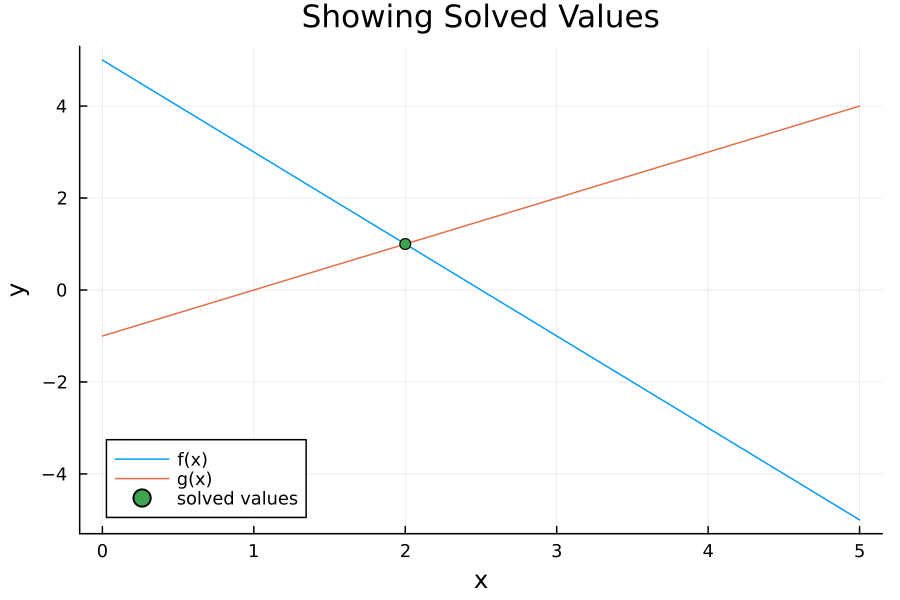

In [1]:
using LinearAlgebra
using Plots


function main()

    # vector_ops()
    matrix_ops()

end

function vector_ops()
    x = [1, 2, 3]
    y = [1; 2; 3]
    z = [1 2 3]
    q = [1 2 3; 4 5 6]

    # display(x)
    # display(y)
    # display(z)
    # display(q)

    # norm
    # println(norm(x))
    # println(x / norm(x))
    # println(normalize(x))

    # dot product
    # println(dot(x, y))
    # println(x ⋅ y)

    # cross product
    println(cross(x,y))
    println(x × y)

end

function matrix_ops()

    A = [0 2 4; 2 4 2; 3 3 1]
    B = ones(3,3)
    C = [1 1; 1 1; 1 1]

    # matrix multiplication
    # display(A * B)
    # display(A * C)

    # elementwise multiplication
    # display(A .* B)

    # special operations
    # println(tr(A))
    # println(det(A))
    # display(transpose(A))
    # display(eigvals(A))
    # display(eigvecs(A))
    # display(inv(A))

    # special matrices
    # D = [1 0 0; 0 1 0; 0 0 1]
    # display(D)
    # D = Diagonal(D)

    # linear system Ax = b
    A = [1 2; 1 -1]
    b = [5, -1]

    # A = factorize(A)
    # display(A)
    # display(A.L * A.U)

    x0 = A \ b

    xlin = range(0, 5, length=50)
    f(x) = 5 - 2x
    g(x) = -1 + x

    println(x0)

    plot(xlin, f.(xlin), label="f(x)", xaxis="x", yaxis="y")
    plot!(xlin, g.(xlin), label="g(x)", title="Showing Solved Values")
    scatter!((x0[2], x0[1]), label="solved values", dpi=150)
end


main()

# Linear Algebra Julia

We aim to solve Ax = b

We start with classical 1D Laplace problem

$$
\begin{cases}
U_{xx}(x) = f(x) & \quad \text{for $x \in (0,1)$}\\ 
U(0) = \alpha \\
U(1) = \beta
\end{cases}
$$


Solution will be in the format: (assuming we have N+2 grid points)

$$
U = 
\begin{bmatrix}
U_1 \\[0.3em]
U_2 \\[0.3em]
U_3 \\[0.3em]
\vdots \\[0.3em]
U_{N+2} \\[0.3em]
U_{N+3} \\[0.3em]
\end{bmatrix}
$$

Therefore we have N+1 spatial intervals. For the tridiagonal matrix we will have a N by N matrix and this will solve for the internal U's: 


$$
U_{interior} = 
\begin{bmatrix}
\cancel{U_1} \\[0.3em]
U_2 \\[0.3em]
U_3 \\[0.3em]
\vdots \\[0.3em]
U_{N+2} \\[0.3em]
\cancel{U_{N+3}} \\[0.3em]
\end{bmatrix} =

\begin{bmatrix}
U_2 \\[0.3em]
U_3 \\[0.3em]
\vdots \\[0.3em]
U_{N+2} \\[0.3em]
\end{bmatrix}
$$

Note as mentioned the above array has N points, that will be the same N in the N by N matrix! Defining like that provide a more optimzed code.




See my notebook on that, later write the markdown part of it.

In [60]:
# Problem definition
# Boundary Conditions
α = 1
β = 1

f(x) = exp(x)


# Create spatial grid: 

N = 1000 # Number of interior grid points
L = 1 # Length
h = L/(N+1) # spatial increment, N-1 is the number of spatial intervals

U = zeros(N+2)
U[1] = α
U[end] = β
 
x = collect(LinRange(0,L,N+2)); # Can be range as well --> collect(range(0,1,N+1))

In [61]:
function fillmat(A,F,h)
    for i in 1:N
        ind = i + 1 # Refers to the original reference counter (N+2)
        F[i] = h^2 * f(x[ind])
        A[i,i] = -2
        if i<N
            A[i,i+1] = 1
        end
        if i>1 
            A[i,i-1] = 1
        end
    end

    # Update F with the BC's (Dirichlet --> this code is optimized for this case only, if Neumann conditionals would be necessary)
    F[1] = F[1] - α
    F[end] = F[end] - β

    return A, F
end


#A = Matrix{Float64}(undef,N,N) # The input undef create a zeros matrix by default
A = zeros(N,N)
F = zeros(N)
A, F = fillmat(A,F,h)

([-2.0 1.0 … 0.0 0.0; 1.0 -2.0 … 0.0 0.0; … ; 0.0 0.0 … -2.0 1.0; 0.0 0.0 … 1.0 -2.0], [-0.9999990009994998, 9.999990013323336e-7, 1.0009985005008731e-6, 1.0019989986689986e-6, 1.0030004968352095e-6, 1.0040029959990046e-6, 1.0050064971608813e-6, 1.0060110013223362e-6, 1.0070165094858684e-6, 1.0080230226549773e-6  …  2.685886898259403e-6, 2.6885714426619723e-6, 2.69125867026712e-6, 2.6939485837567065e-6, 2.6966411858152747e-6, 2.6993364791300492e-6, 2.7020344663909413e-6, 2.70473515029055e-6, 2.707438533524167e-6, -0.9999972898553812])

### Using Backslash

In [183]:
@time begin
    Uint = A\F
end
   
U[2:end-1] = Uint;

  0.031424 seconds (4 allocations: 7.645 MiB)


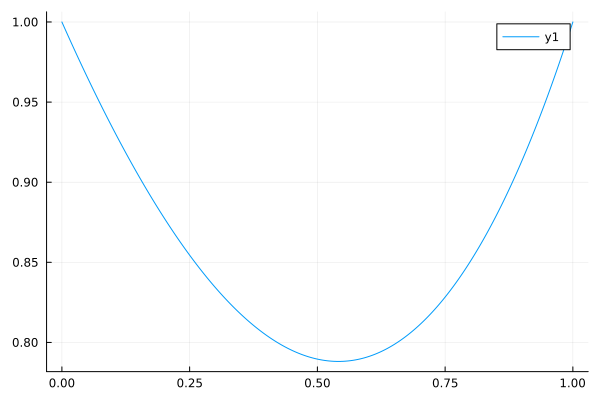

In [172]:
plot(x,U)

### Using LU Factorization

In [173]:
# Example
L, U, p = lu(A) # LU factorization function from LinearAlgebra module
typeof(lu(A))

LU{Float64, Matrix{Float64}, Vector{Int64}}

In [178]:
LU_A = lu(A);

In [186]:
@time begin
    Uint = LU_A\F
end

U[2:end-1] = Uint;

  0.000647 seconds (1 allocation: 7.938 KiB)


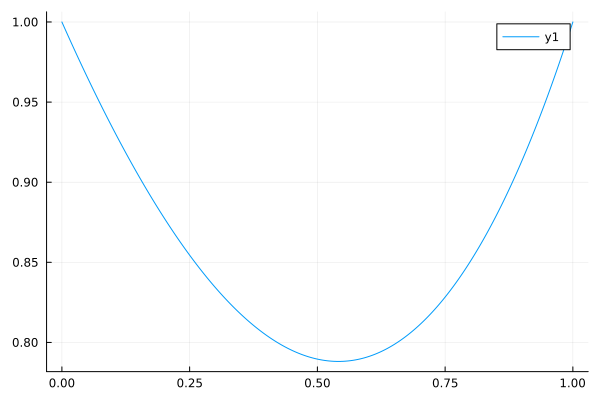

In [185]:
plot(x, U)

### Sparse Matrices

In [187]:
using SparseArrays

In [189]:
As = sparse(A);

In [190]:
# Or create an empty zeros sparse matrix

As = spzeros(N,N)
As, F = fillmat(A,F,h)

([-2.0 1.0 … 0.0 0.0; 1.0 -2.0 … 0.0 0.0; … ; 0.0 0.0 … -2.0 1.0; 0.0 0.0 … 1.0 -2.0], [-0.9999990009994998, 9.999990013323336e-7, 1.0009985005008731e-6, 1.0019989986689986e-6, 1.0030004968352095e-6, 1.0040029959990046e-6, 1.0050064971608813e-6, 1.0060110013223362e-6, 1.0070165094858684e-6, 1.0080230226549773e-6  …  2.685886898259403e-6, 2.6885714426619723e-6, 2.69125867026712e-6, 2.6939485837567065e-6, 2.6966411858152747e-6, 2.6993364791300492e-6, 2.7020344663909413e-6, 2.70473515029055e-6, 2.707438533524167e-6, -0.9999972898553812])

In [200]:
@time begin
    Uint = As\F
end

U[2:end-1] = Uint;

  0.008415 seconds (4 allocations: 7.645 MiB)


### Iterative Methods

In [62]:
using IterativeSolvers, LinearMaps

In [63]:
iter_A(x) = [ -2x[1] + x[2]; x[1:end-2] - 2x[2:end-1] + x[3:end] ; -2x[end] + x[end-1] ]

iter_A (generic function with 1 method)

In [64]:
Ax = LinearMap(x->iter_A(x), N,N)

1000×1000 LinearMaps.FunctionMap{Float64}(#13; ismutating=false, issymmetric=false, ishermitian=false, isposdef=false)

In [65]:
Uint_gmres = gmres(Ax, F, reltol = 1e-8, restart = N)

1000-element Vector{Float64}:
 0.9992829519744205
 0.9985669012362344
 0.9978518470708371
 0.9971377887646112
 0.99642472560493
 0.9957126654457401
 0.9950016092895398
 0.99429155813983
 0.9935825130011162
 0.992874474878906
 ⋮
 0.9911184829939248
 0.9920945223278783
 0.9930732529205963
 0.9940546774619933
 0.995038798644671
 0.9960256191639237
 0.997015148570185
 0.9980073878510017
 0.9990023379966242